# Meteoschweiz 
## Current meteorological observations 

In [20]:
# ‘Soft’ reset: Only clears your namespace, leaving history intact.
%reset -sf 
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.cbook

## Available weather stations

In [21]:
url = 'https://data.geo.admin.ch'
path = 'ch.meteoschweiz.klima/nbcn-tageswerte'
wsurl = url + '/' + path + '/' + 'liste-download-nbcn-d.csv'
ws = pd.read_csv(wsurl, sep=";", header=0, encoding = "ISO-8859-1").dropna()
#ws[['Station', 'station/location','URL Current year']].head()
ws.drop(['URL Previous years (verified data)', 'URL Current year'], axis=1)

,Station,station/location,WIGOS-ID,Data since,Station height m. a. sea level,CoordinatesE,CoordinatesN,Latitude,Longitude,Climate region,Canton
0,Altdorf,ALT,0-20000-0-06672,01.01.1864,438.0,2690181.0,1193564.0,46.887069,8.621894,Central Alpine north slope,UR
1,Andermatt,ANT,0-20000-0-06695,01.01.1864,1438.0,2687445.0,1165044.0,46.630914,8.580553,Central Alpine north slope,UR
2,Basel / Binningen,BAS,0-20000-0-06601,01.01.1755,316.0,2610909.0,1265612.0,47.541142,7.583525,Eastern Jura,BL
3,Bern / Zollikofen,BER,0-20000-0-06631,01.01.1864,553.0,2601934.0,1204410.0,46.990744,7.464061,Central plateau,BE
4,La Chaux-de-Fonds,CDF,0-20000-0-06612,01.01.1900,1017.0,2550919.0,1214862.0,47.082947,6.792314,Western Jura,NE
5,Château-d'Oex,CHD,0-20000-0-06627,01.01.1879,1028.0,2577040.0,1147655.0,46.479819,7.139656,Western Alpine north slope,VD
6,Chaumont,CHM,0-20000-0-06608,01.01.1864,1136.0,2565060.0,1211007.0,47.049169,6.978825,Western Jura,NE
7,Davos,DAV,0-20000-0-06784,01.01.1864,1594.0,2783519.0,1187459.0,46.812969,9.843558,Northern and central Grisons,GR
8,Elm,ELM,0-20000-0-06682,01.02.1878,958.0,2732266.0,1198425.0,46.923747,9.175350,Eastern Alpine north slope,GL
9,Engelberg,ENG,0-20000-0-06655,01.01.1864,1036.0,2674162.0,1186069.0,46.821639,8.410514,Central Alpine north slope,OW


## Select one weather station (using a select widget)

In [123]:
import ipywidgets as widgets
wslist = ws['Station'].tolist()
# index of wslist in [0..28]
station = widgets.Select(value=wslist[2], # 2 preselects BAS weather station
                         placeholder='Choose a Station',
                         options=wslist,
                         description='Station:',
                         ensure_option=True,
                         disabled=False
                        )
display(station)
##print(station.keys)
print(station.value)

Select(description='Station:', index=2, options=('Altdorf', 'Andermatt', 'Basel / Binningen', 'Bern / Zollikof…

Basel / Binningen


In [140]:
ws[ws.Station==station.value] 
label = ws[ws.Station==station.value]['station/location'].to_string()[::-1][0:3][::-1]
print(f"The label of weather station {station.value} is {label}.")

The label of weather station Bern / Zollikofen is BER.


## Read online observations from selected weather station

In [141]:
filenm = "nbcn-daily_"
ext="csv"
dlf = url + "/" + path + "/" + filenm + label + "_current." + ext
df = pd.read_csv(dlf, sep=";", index_col='date',converters={'date':pd.to_datetime}).drop(['station/location'], axis=1) #, engine='pyarrow')
for col in  df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.tail(7)

,gre000d0,hto000d0,nto000d0,prestad0,rre150d0,sre000d0,tre200d0,tre200dn,tre200dx,ure200d0
date,,,,,,,,,,
2023-01-28,16,4,NaN,956.3,0.0,0,-0.9,-1.5,-0.1,76.9
2023-01-29,42,4,NaN,960.5,0.0,0,-1.4,-5.8,0.0,75.4
2023-01-30,87,3,NaN,960.8,0.0,230,-1.2,-6.4,3.0,77.8
2023-01-31,96,2,NaN,962.6,0.0,309,1.2,-3.0,4.4,79.9
2023-02-01,85,0,NaN,962.5,0.0,222,2.4,-2.2,6.7,74.9
2023-02-02,81,0,NaN,965.3,0.0,175,4.0,0.3,7.7,69.2
2023-02-03,106,0,NaN,967.8,0.0,390,3.6,-0.2,8.2,73.7


## Compute summary statistics

In [142]:
df.describe()

,gre000d0,hto000d0,nto000d0,prestad0,rre150d0,sre000d0,tre200d0,tre200dn,tre200dx,ure200d0
count,34.000000,34.000000,0.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,43.441176,2.264706,NaN,954.547059,2.011765,94.647059,2.002941,-1.317647,4.929412,81.935294
std,27.691144,3.018216,NaN,10.159493,4.200849,124.794833,4.124611,4.832182,4.731809,6.915108
min,13.000000,0.000000,NaN,923.400000,0.000000,0.000000,-7.200000,-14.100000,-2.500000,69.200000
25%,17.000000,0.000000,NaN,952.175000,0.000000,0.000000,-1.075000,-2.800000,0.175000,77.850000
50%,35.000000,0.000000,NaN,957.550000,0.000000,24.000000,2.950000,-0.600000,6.500000,81.500000
75%,61.500000,4.750000,NaN,960.875000,1.450000,201.250000,5.450000,2.000000,8.425000,85.900000
max,106.000000,9.000000,NaN,967.800000,19.900000,390.000000,7.700000,5.300000,14.500000,96.700000


In [143]:
(rows, cols) = df.shape
print(f"{rows} observations from {min(df.index)} to {max(df.index)}.")

34 observations from 2023-01-01 00:00:00 to 2023-02-03 00:00:00.


## Description of observed parameters

In [144]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

zip_url = url + "/" + path + "/" + "data.zip"
plist = [] # parameter
ulist = [] # unit
dlist = [] # description

with urlopen(zip_url) as f:
    with BytesIO(f.read()) as b, ZipFile(b) as myzipfile:
        rf = myzipfile.open('1_how-to-download-nbcn-d.txt')
        blines = rf.readlines()
        rf.close()
        for i in range(14, 25):
            line =blines[i].decode('unicode-escape').rstrip('\r\n')
            plist.append(line[0:21].strip())
            ulist.append(line[21:38].strip())
            dlist.append(line[38:].strip('\n'))

# list of lists instead of list of tuples
##zipped = zip(plist[1:], ulist[1:], dlist[1:])
list_of_lists = [list(tup) for tup in zip(plist[1:], ulist[1:], dlist[1:])]
cols = [plist[0], ulist[0], dlist[0]]

par = pd.DataFrame(list_of_lists, columns = cols)
print(par)

  Parameter Einheit                                       Beschreibung
0  gre000d0    W/m²                       Globalstrahlung; Tagesmittel
1  hto000d0      cm          Gesamtschneehöhe; Morgenmessung von 6 UTC
2  nto000d0       %                       Gesamtbewölkung; Tagesmittel
3  prestad0     hPa      Luftdruck auf Stationshöhe (QFE); Tagesmittel
4  rre150d0      mm    Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag
5  sre000d0     min                      Sonnenscheindauer; Tagessumme
6  tre200d0      °C         Lufttemperatur 2 m über Boden; Tagesmittel
7  tre200dn      °C        Lufttemperatur 2 m über Boden; Tagesminimum
8  tre200dx      °C        Lufttemperatur 2 m über Boden; Tagesmaximum
9  ure200d0       %  Relative Luftfeuchtigkeit 2 m über Boden; Tage...


## Scatter plot  air temperature

In [145]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
fswidth = 10
fsheight = 5

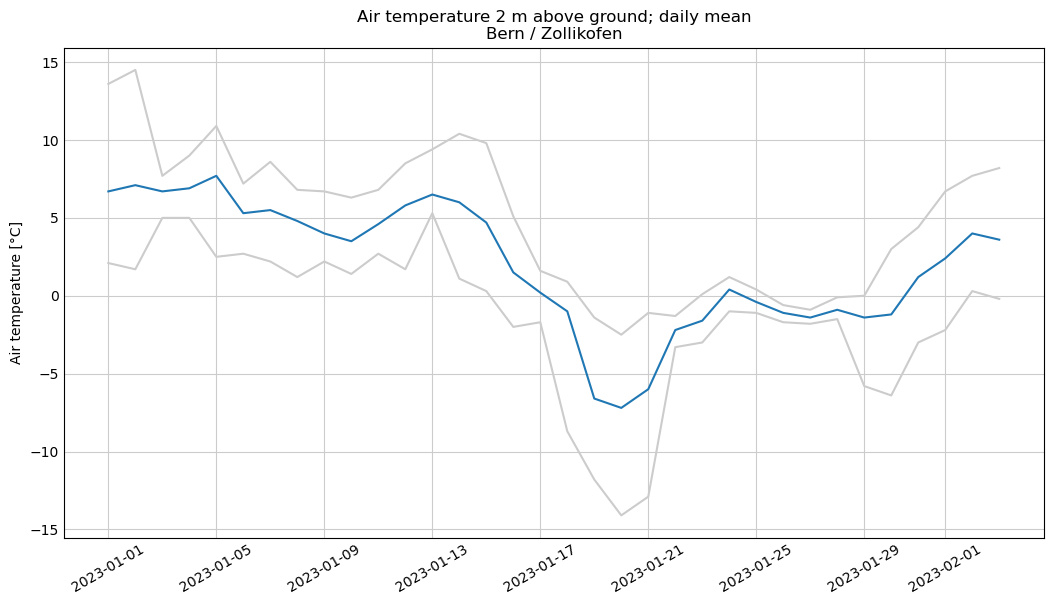

In [146]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.tre200d0)
axs.plot(df.index, df.tre200dn, color='0.8')
axs.plot(df.index, df.tre200dx, color='0.8')
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')
#axs.grid(which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Air temperature [°C]')
plt.title('Air temperature 2 m above ground; daily mean\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot global radiation

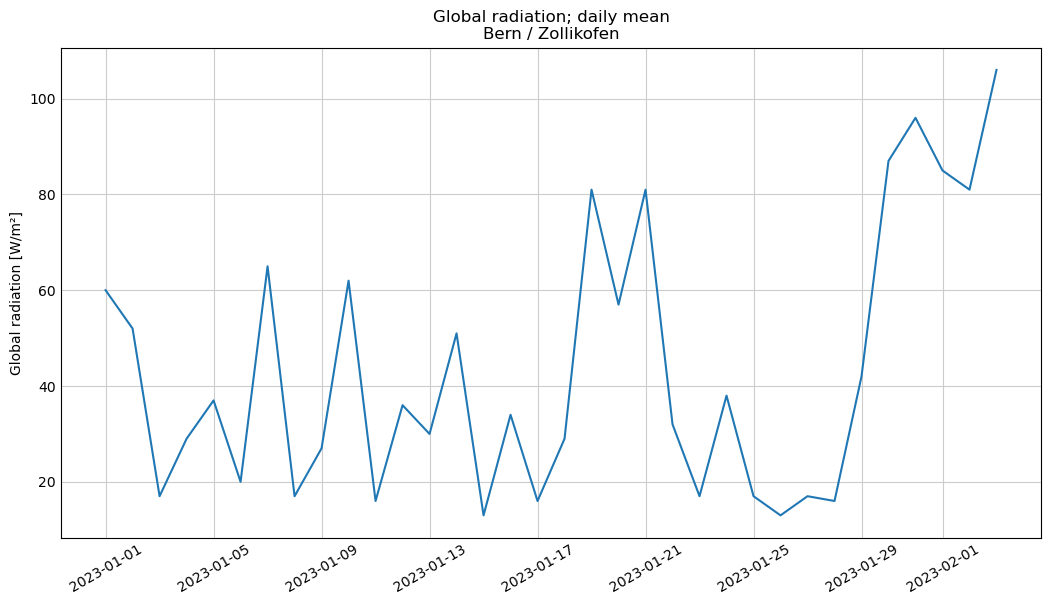

In [147]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.gre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Global radiation [W/m²]')
plt.title('Global radiation; daily mean\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot total snow depth

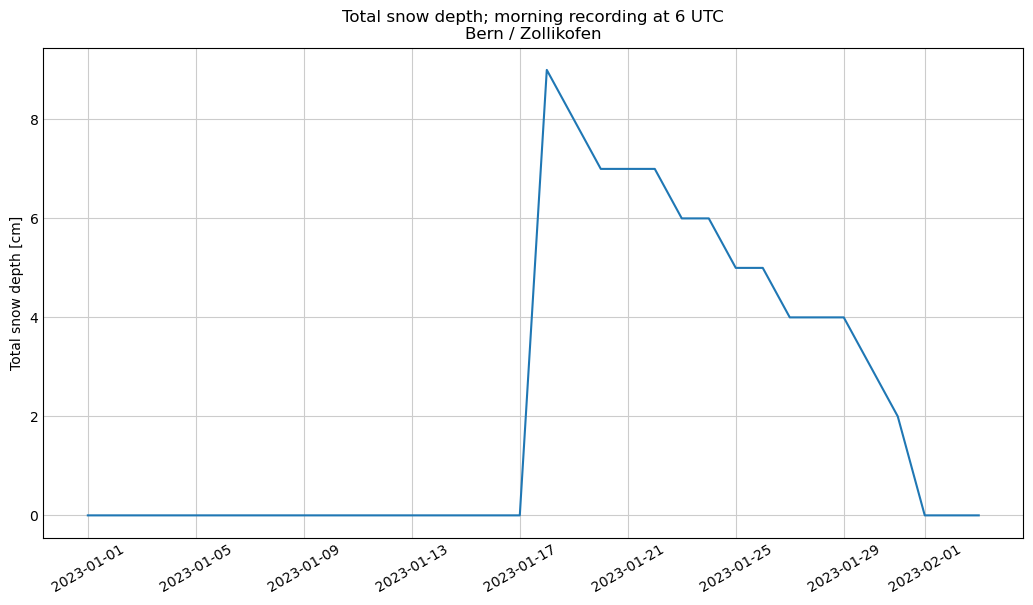

In [148]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.hto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Total snow depth [cm]')
plt.title('Total snow depth; morning recording at 6 UTC\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot cloud cover

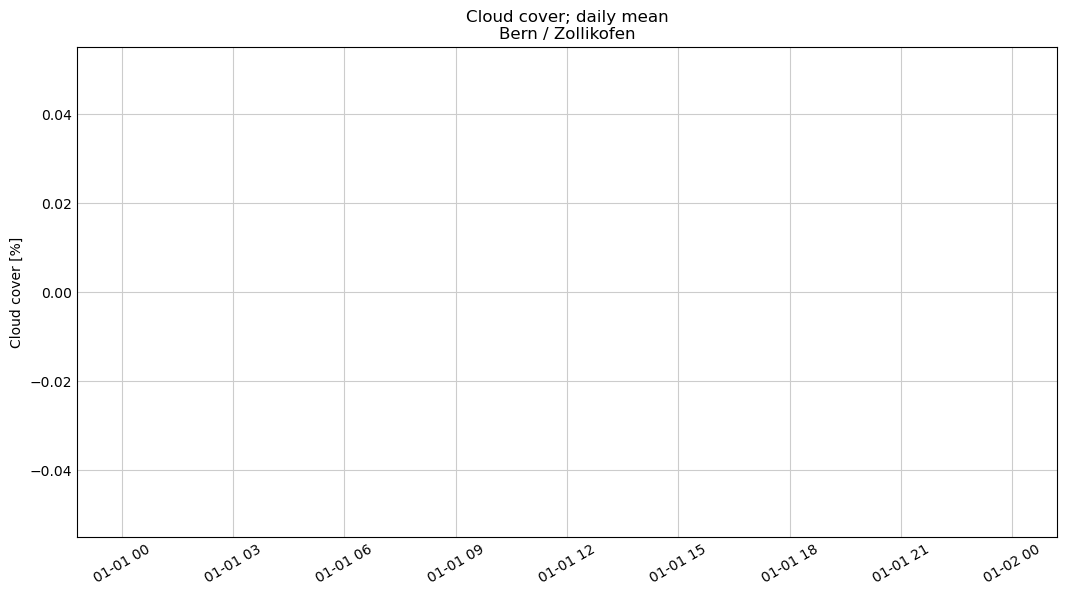

In [149]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.nto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Cloud cover [%]')
plt.title('Cloud cover; daily mean\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot pressure at station level 

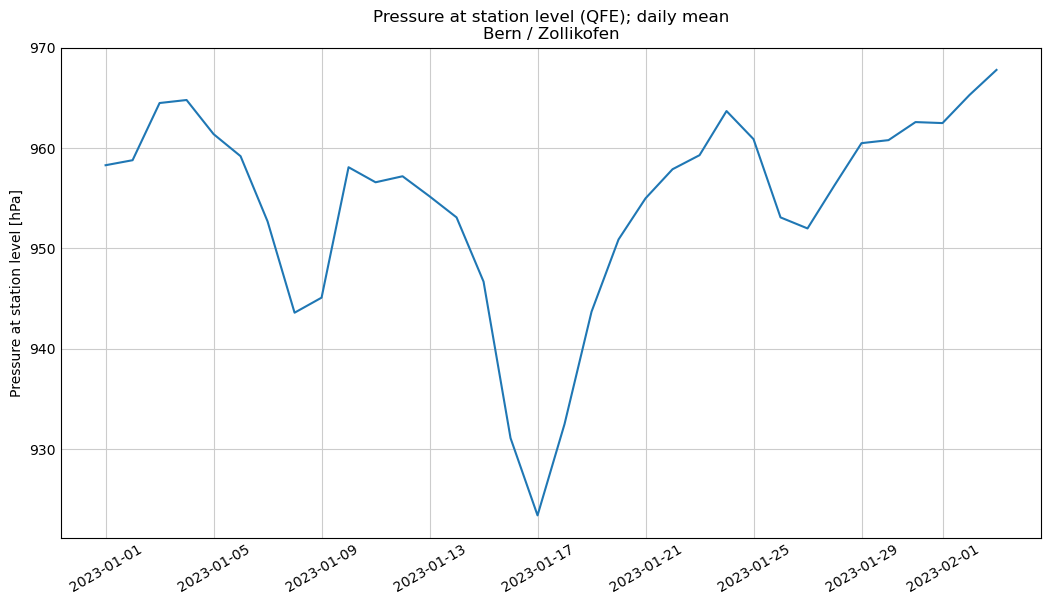

In [150]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.prestad0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Pressure at station level [hPa]')
plt.title('Pressure at station level (QFE); daily mean\n' + station.value)
plt.xticks(rotation=30)

plt.show()

In [151]:
## Scatter plot cloud cover

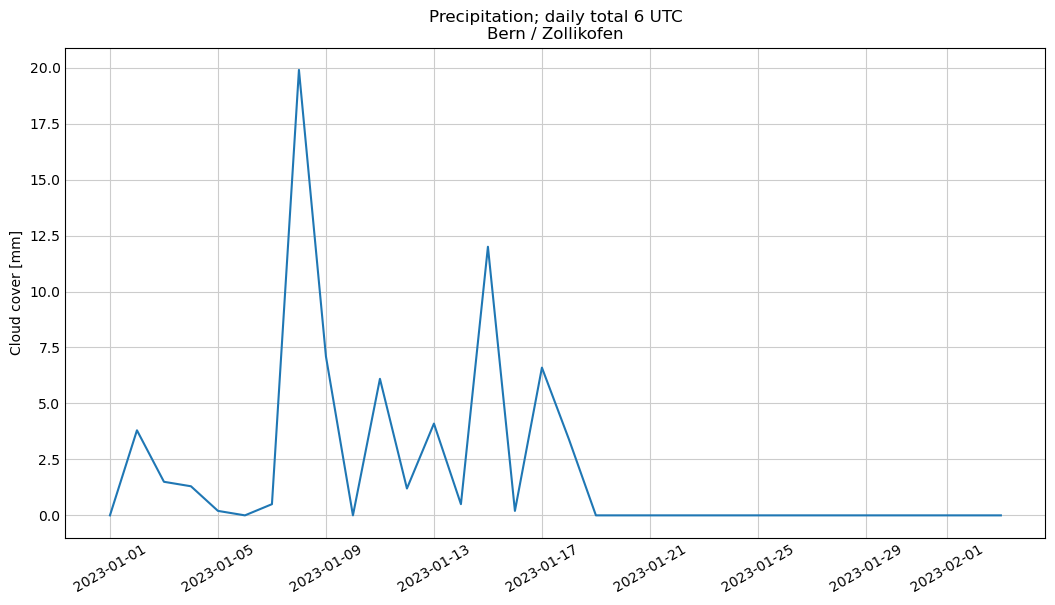

In [152]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.rre150d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Cloud cover [mm]')
plt.title('Precipitation; daily total 6 UTC\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot sunshine duration

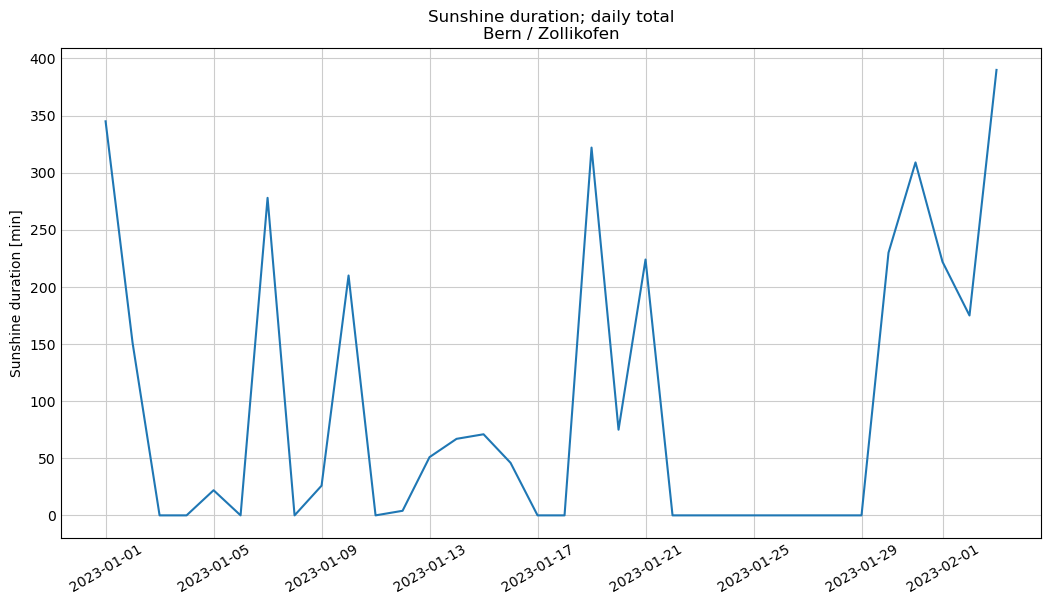

In [153]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.sre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Sunshine duration [min]')
plt.title('Sunshine duration; daily total\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Scatter plot relative air humidity

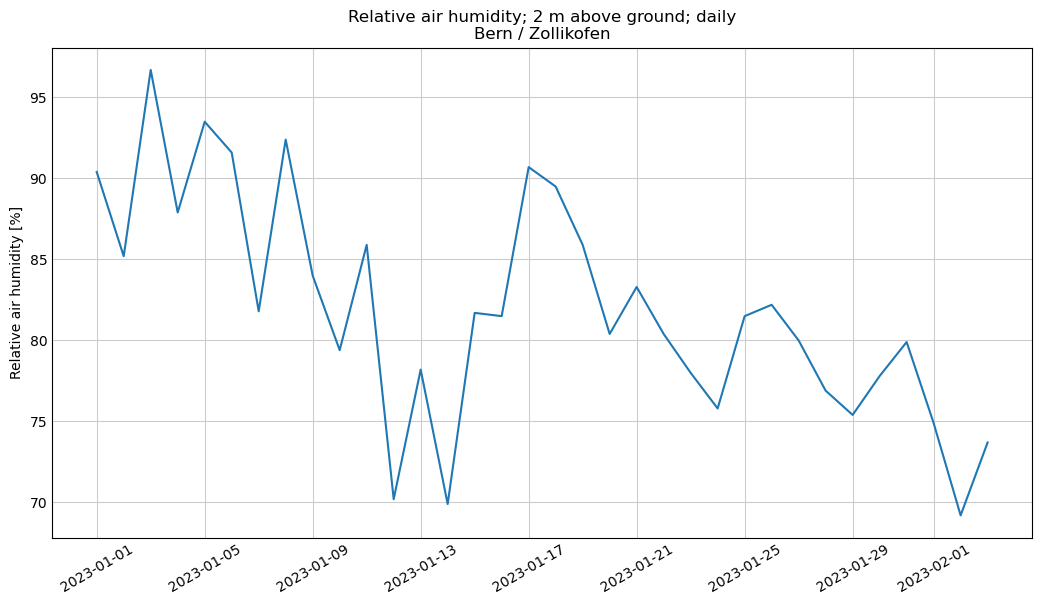

In [154]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.ure200d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Relative air humidity [%]')
plt.title('Relative air humidity; 2 m above ground; daily\n' + station.value)
plt.xticks(rotation=30)

plt.show()

## Export as HTML Report

In [155]:
#./jupyter-nbconvert.exe --to html 'path/to/nb.ipynb'`
# ipython nbconvert --to html notebook.ipynb
# jupyter nbconvert --to html --no-input my-notebook.ipynb